In [24]:
import sys
sys.path.append('../')
import os
from monai.inferers import SlidingWindowInferer
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from configs.config import get_config
from model.build import build_model
plt.style.use('default')

In [25]:
config_path = "/home/wwd/deeplearning/configs/config.yaml"
config = get_config(config_path)

In [26]:
image = '../dataset/SEAM1_data.npz'
image = np.load(image)['arr_0']
print(image.shape)
image = image[150, :, :1976]

label = '../dataset/SEAM1_primaries.npz'
label = np.load(label)['arr_0']
print(label.shape)
label = label[150, :, :1976]

(638, 638, 2002)
(638, 638, 2002)


In [27]:
nx = image.shape[0]
dx = 4

nt = image.shape[1]
dt = 0.004

In [28]:
print(np.min(image), np.max(image), np.mean(image))
print(np.min(label), np.max(label), np.mean(label))

-0.15219459 0.10803551 2.5831465e-08
-0.15219417 0.10803524 4.76272e-09


In [29]:
image = image[:, :-1]
label = label[:, :-1]

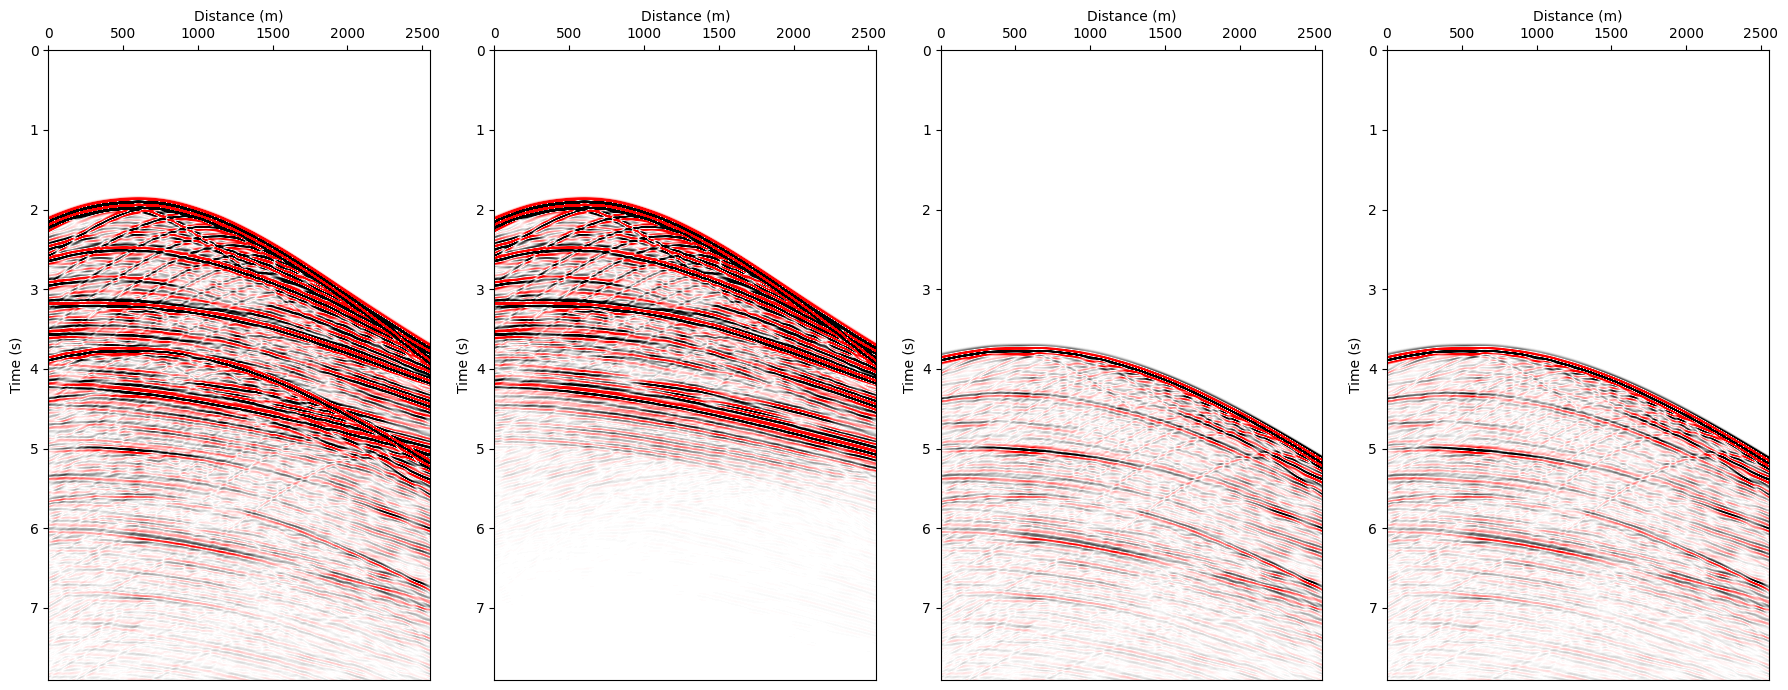

In [30]:
vmax = 5e-3
vmin = -vmax

from seis import seis

fig, axs = plt.subplots(1, 4, figsize=(18, 7))

axs[0].imshow(image.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[0].set_title('image',fontsize=10)
axs[0].set_xlabel('Distance (m)',fontsize=10)
axs[0].set_ylabel('Time (s)',fontsize=10)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].xaxis.set_label_position('top')
axs[0].xaxis.set_label_position('top')
axs[0].xaxis.tick_top()                 # 设置刻度在上方

axs[1].imshow(label.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[1].set_title('label',fontsize=10)
axs[1].set_xlabel('Distance (m)',fontsize=10)
axs[1].set_ylabel('Time (s)',fontsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].xaxis.set_label_position('top')
axs[1].xaxis.tick_top()                 # 设置刻度在上方

diff = image - label
axs[2].imshow(diff.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[2].set_title('diff',fontsize=10)
axs[2].set_xlabel('Distance (m)',fontsize=10)
axs[2].set_ylabel('Time (s)',fontsize=10)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)
axs[2].xaxis.set_label_position('top')
axs[2].xaxis.tick_top()                 # 设置刻度在上方

diff = image - label
axs[3].imshow(diff.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[2].set_title('diff',fontsize=10)
axs[3].set_xlabel('Distance (m)',fontsize=10)
axs[3].set_ylabel('Time (s)',fontsize=10)
axs[3].tick_params(axis='x', labelsize=10)
axs[3].tick_params(axis='y', labelsize=10)
axs[3].xaxis.set_label_position('top')
axs[3].xaxis.tick_top()                 # 设置刻度在上方

plt.tight_layout()

In [31]:
# mean = np.mean(image)
# std = np.std(image)
# image_normalization =  (image - mean) / std
# image_normalization = image / np.abs(np.max(image))

In [32]:
# mean = np.mean(label)
# std = np.std(label)
# label_normalization =  (label - mean) / std
# label_normalization = label / np.abs(np.max(label))

In [33]:
# print(np.min(image_normalization), np.max(image_normalization), np.mean(image_normalization))
# print(np.min(label_normalization), np.max(label_normalization), np.mean(label_normalization))

In [34]:
input = torch.from_numpy(image)
input.unsqueeze_(0)
input.unsqueeze_(0)
input.shape

torch.Size([1, 1, 638, 1975])

In [35]:
net = build_model(config)


weight_path = config.train.output + '/' +  config.model.name
weight_file = "best_model.pth"
weight = os.path.join(weight_path, weight_file)
checkpoint = torch.load(weight, map_location=torch.device("cpu"))  # 先加载整个字典
net.load_state_dict(checkpoint["model_state_dict"])  # 仅加载模型权重

net.eval()

/tmp/ipykernel_15587/3646848364.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(weight, map_location=torch.device("cpu"))  # 先加载整个字典


UNet2D(
  (inc): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=Tru

In [36]:
window_infer = SlidingWindowInferer(
        roi_size=[512, 512],
        sw_batch_size=4,
        overlap=0.5,
        mode='gaussian',
        progress=True,
        device=torch.device('cpu'),
    )

In [37]:
with torch.no_grad():
    output = window_infer(inputs=input, network=net)
    # output = net(input)
output = output.squeeze().detach().numpy()
output.shape

  0%|          | 0/4 [00:04<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
print(np.min(image), np.max(image), np.mean(image))
print(np.min(output), np.max(output), np.mean(output))
print(np.min(label), np.max(label), np.mean(label))

-0.16133374 0.114967674 -5.4417672e-08
-0.2973947 0.20106965 -7.419101e-06
-0.16133425 0.114966676 7.109042e-09


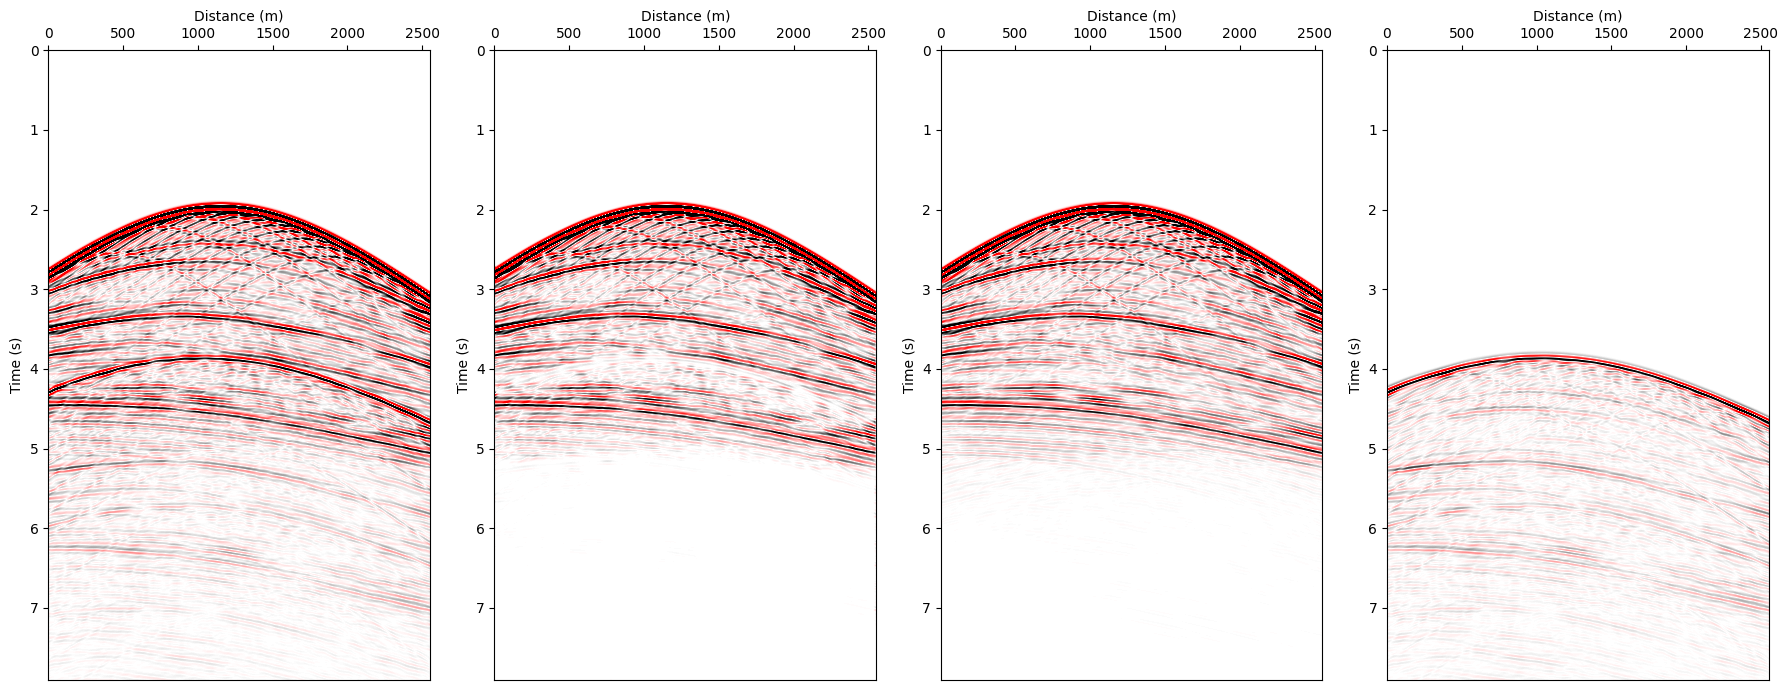

In [ ]:
vmax = 1e-2
vmin = -vmax

fig, axs = plt.subplots(1, 4, figsize=(18, 7))

axs[0].imshow(image.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[0].set_title('image',fontsize=10)
axs[0].set_xlabel('Distance (m)',fontsize=10)
axs[0].set_ylabel('Time (s)',fontsize=10)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].xaxis.set_label_position('top')  # 设置标签位置在上方
axs[0].xaxis.tick_top()                 # 设置刻度在上方

axs[1].imshow(output.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[1].set_title('output',fontsize=10)
axs[1].set_xlabel('Distance (m)',fontsize=10)
axs[1].set_ylabel('Time (s)',fontsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].xaxis.set_label_position('top')  # 设置标签位置在上方
axs[1].xaxis.tick_top()                 # 设置刻度在上方

axs[2].imshow(label.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[2].set_title('label',fontsize=10)
axs[2].set_xlabel('Distance (m)',fontsize=10)
axs[2].set_ylabel('Time (s)',fontsize=10)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)
axs[2].xaxis.set_label_position('top')  # 设置标签位置在上方
axs[2].xaxis.tick_top()                 # 设置刻度在上方

diff1 = image - label
axs[3].imshow(diff1.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap=seis(2))
# axs[3].set_title('image-output',fontsize=10)
axs[3].set_xlabel('Distance (m)',fontsize=10)
axs[3].set_ylabel('Time (s)',fontsize=10)
axs[3].tick_params(axis='x', labelsize=10)
axs[3].tick_params(axis='y', labelsize=10)
axs[3].xaxis.set_label_position('top')  # 设置标签位置在上方
axs[3].xaxis.tick_top()                 # 设置刻度在上方

# diff2 = label - output
# axs[3].imshow(diff2.T, aspect='auto', vmin=vmin, vmax=vmax, 
#               extent=[0, nx*dx, nt*dt, 0], cmap='gray')
# # axs[3].set_title('label-output',fontsize=10)
# axs[3].set_xlabel('Distance (m)',fontsize=10)
# axs[3].set_ylabel('Time (s)',fontsize=10)
# axs[3].tick_params(axis='x', labelsize=10)
# axs[3].tick_params(axis='y', labelsize=10)
# axs[3].xaxis.set_label_position('top')  # 设置标签位置在上方
# axs[3].xaxis.tick_top()                 # 设置刻度在上方

plt.tight_layout()